In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df=pd.read_csv('spamraw.csv')

In [3]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [4]:
df.tail()

,type,text
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
5558,ham,Shall call now dear having food


In [5]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [6]:
df.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4812   4503                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [7]:
df.type.value_counts()

ham     4812
spam     747
Name: type, dtype: int64

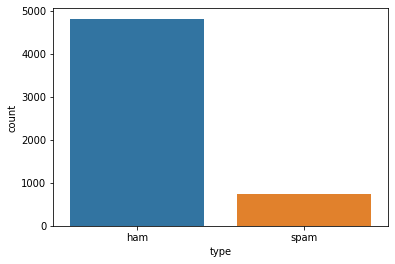

In [8]:
sns.countplot(df.type)

In [9]:
df['spam']=df['type'].map({'spam':1,'ham':0}).astype(int)

In [10]:
df.sample(10)

,type,text,spam
1266,spam,"New Tones This week include: 1)McFly-All Ab..,...",1
2610,ham,He chickened out. He messaged me he would be l...,0
5261,ham,"Just so that you know,yetunde hasn't sent mone...",0
3403,spam,You have 1 new voicemail. Please call 08719181...,1
2504,ham,We took hooch for a walk toaday and i fell ove...,0
1645,ham,Nvm take ur time.,0
4431,ham,Anytime lor...,0
519,spam,Free video camera phones with Half Price line ...,1
3284,ham,What about this one then.,0
1281,ham,Hello beautiful r u ok? I've kinda ad a row wi...,0


In [11]:
df['length']=df['text'].apply(len)

In [12]:
df.sample(10)

,type,text,spam,length
3906,ham,"U so lousy, run already come back then half de...",0,58
1512,ham,I dont know ask to my brother. Nothing problem...,0,77
2406,ham,Oops my phone died and I didn't even know. Yea...,0,65
1677,ham,No got new job at bar in airport on satsgettin...,0,94
18,ham,Up to u... u wan come then come lor... But i d...,0,71
2789,ham,I'm putting it on now. It should be ready for ...,0,52
2407,ham,What time. I€˜m out until prob 3 or so,0,38
2509,ham,One of the joys in lifeis waking up each daywi...,0,127
2468,ham,Just taste fish curry :-P,0,25
2938,ham,Id have to check but there's only like 1 bowls...,0,57


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFD1DE0188>,
      dtype=object)

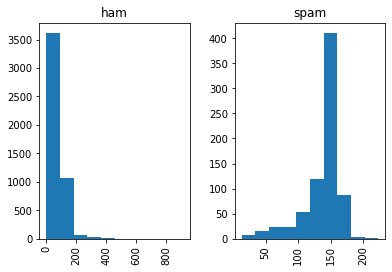

In [13]:
df.hist(column='length',by='type')

In [14]:
df_spam=df[df['spam']==1].copy()
df_ham=df[df['spam']==0].copy()

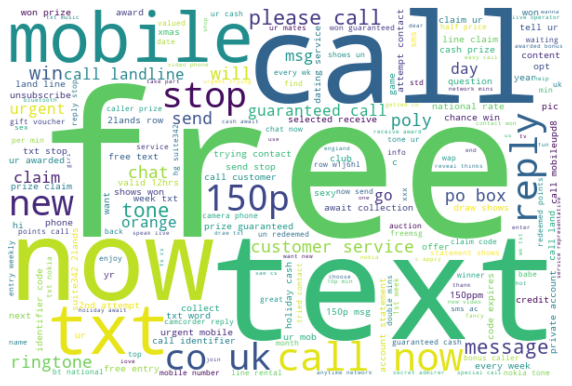

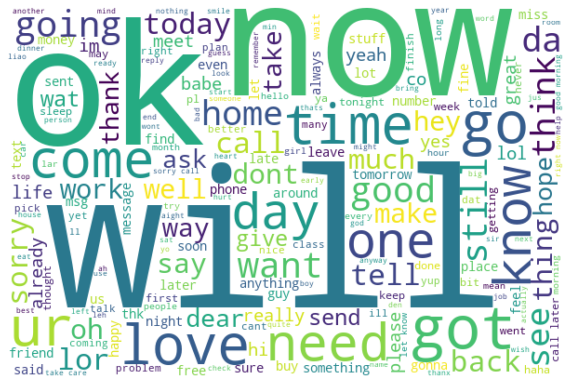

In [15]:
def visualize(label):
    words = ''
    for msg in df[df['type']== label]['text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width = 600, height = 400,background_color='white').generate(words)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
visualize('spam')
visualize('ham')

In [16]:
y=df['spam']
x=df['text']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [18]:
vec=CountVectorizer()
vec.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [19]:
xtrain=vec.transform(x_train)
xtest=vec.transform(x_test)

In [20]:
model=LogisticRegression()
model.fit(xtrain,y_train)
prediction=model.predict(xtest)

In [21]:
cm=confusion_matrix(y_test,prediction)
cm

array([[954,   2],
       [ 26, 130]], dtype=int64)

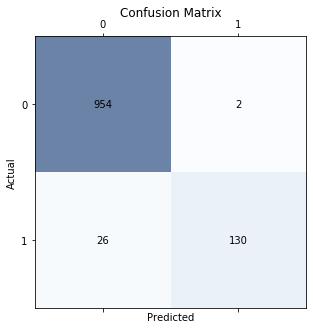

In [22]:
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.60)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       956
           1       0.98      0.83      0.90       156

    accuracy                           0.97      1112
   macro avg       0.98      0.92      0.94      1112
weighted avg       0.98      0.97      0.97      1112



In [24]:
accuracy_score(y_test,prediction)

0.9748201438848921

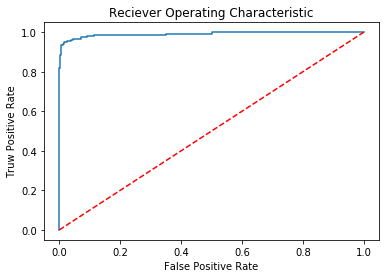

In [25]:
auc=roc_auc_score(y_test,prediction)
fpr,tpr,thr=roc_curve(y_test,model.predict_proba(xtest)[:,1])
plt.plot(fpr,tpr,label='AUC(area=%0.3f)'% auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Reciever Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('Truw Positive Rate')
plt.show()